# Task 2
This week you have learnt about various types of ML models. <br>
Let us focus on two of them.

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Instructions
1. create a folder called synapse_w2 in your drive
2. add housing_data.csv, classified_data.txt, titanic_data.csv in the folder.
3. You will use the data from this path in this notebook

# 1)  Linear Regression on Housing Price

### Import packages and dataset

In [115]:
# import numpy, pandas, matplotlib, seaborn
# add code here
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Read housing_data.csv using pandas and call head() to show first few records.**

In [116]:
# add code here
housing_df = pd.read_csv('housing_data.csv')

### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [117]:
# add code here
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [118]:
# add code here
housing_df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


**Print the names of the columns(features)**

In [122]:
# add code here
housing_df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

### Basic plotting and visualization

**The target quantity is price. Let us see its distribution.** <br>
Plot a histogram of Price. Choose the number of bins by experimenting a little. (Expected: a bell curve shape)

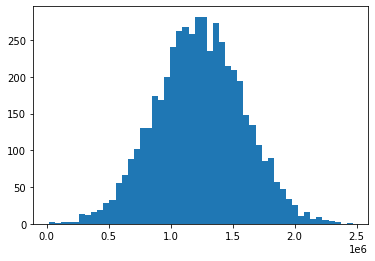

In [123]:
# add code here
plt.hist(housing_df['Price'], bins=50)
plt.show()

**Let us see how the different features are correlated with each other by printing a Correlation Matrix**<br>
Hint: corr()

In [124]:
# add code here
housing_df.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


### Feature and variable sets

**Make a list of data frame column names**
**Create a new dataframe containing all the numerical training features(note that Address is a string so ignore that) and store it in a variable called "X"**<br><br>
**Then create a new dataframe containing the target (Price) and store it in a variable called "y"**

In [125]:
# add code here
X = pd.DataFrame(housing_df)
X.drop('Price', axis=1, inplace=True)
X.drop('Address', axis=1, inplace=True)
y = housing_df['Price']


In [126]:
# This code should print (5000, 5) and (5000,) if everything is correct
print(X.shape, y.shape)

(5000, 5) (5000,)


In [127]:
# print a few record of X
# add code here
print(X.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population  
0                          4.09     23086.800503  
1                          3.09     40173.072174  
2                          5.13     36882.159400  
3                          3.26     34310.242831  
4                          4.23     26354.109472  


In [102]:
# print a few record of y
# add code here
print(y.head())

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64


### Test-train split

**Import train_test_split function from scikit-learn**

In [128]:
# add code here
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [129]:
# add code here
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

**Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above)**

In [130]:
# add code here
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.size, X_test.size, y_train.size, y_test.size)

(3500, 5) (1500, 5) (3500,) (1500,)
17500 7500 3500 1500


### Model fit and training

**Import LinearRegression and metrics from scikit-learn**

In [131]:
# add code for imports here
from sklearn.linear_model import LinearRegression
# Create a Linear Regression object 'lm' by calling LinearRegression()
# add code here
lm = LinearRegression()

**Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable**<br>
Hint: lm.fit()

In [132]:
# add code here
lm.fit(X_train, y_train)

LinearRegression()

### Prediction, error estimate, and regression evaluation matrices

**Prediction using the lm model**<br>
Use model.predict() on X_test and store them in a variable called "predictions".<br>
Print type and size of the predictions. Size should be (1500,) if everything is correct.

In [134]:
# add code here
predictions = lm.predict(X_test)
predictions.size

1500

**Since we're done with our predictions, let's compare it with y_test and see how accurate our predictions are.<br> Plot a Scatter plot of predicted price and y_test set to see if the data fall on a 45 degree straight line**

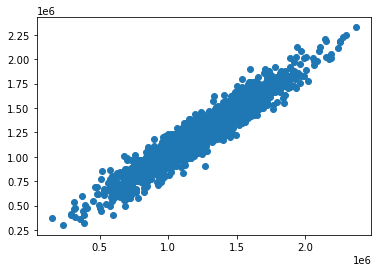

In [148]:
# add code here
plt.scatter(y_test, predictions)

**Print the R-square value and round it to 3 decimal places**<br>
Hint: sklearn metrics.r2_score

In [226]:
# add code here
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.9132944316512547

# 2) K-nearest neighbor Classification

### Import packages and dataset

In [227]:
# import numpy, pandas, matplotlib, seaborn
# add code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**Read classified_data.txt using pandas and call head() to show first few records. Call this dataframe "df"** <br>
Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created.

In [228]:
# add code here
df = pd.read_csv('classified_data.txt', index_col='Unnamed: 0')

### Exloratory Data Analysis (EDA)

**'info()' method to check the data types and number**

In [229]:
# add code here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


**Get the statistical summary of the data set** <br>
Hint: describe()

In [230]:
# add code here
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


### Check the spread of the features

**Store the column names in a list**

In [231]:
# add code here
col = list(df.columns)
col.remove('TARGET CLASS')
col

['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']

**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() 

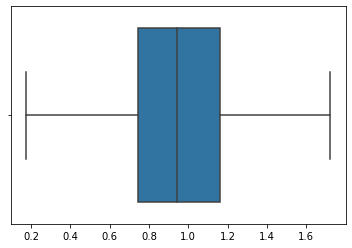

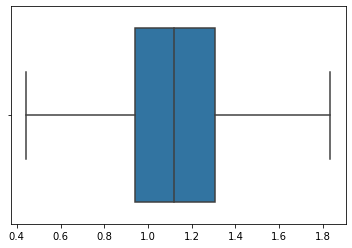

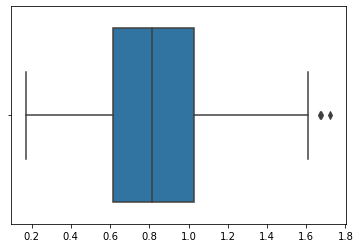

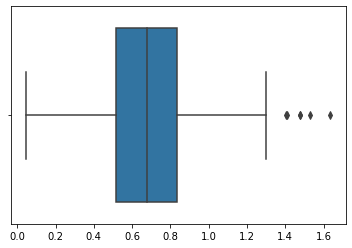

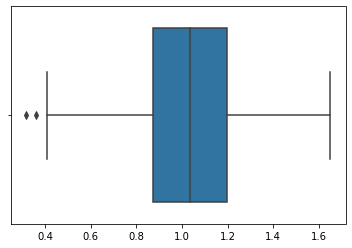

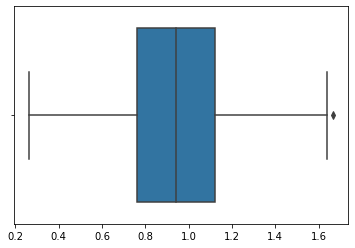

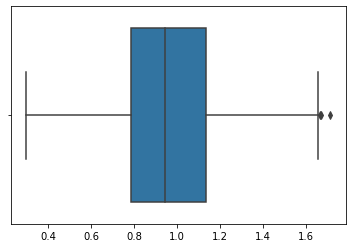

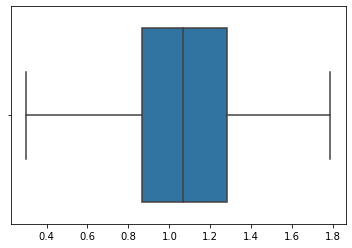

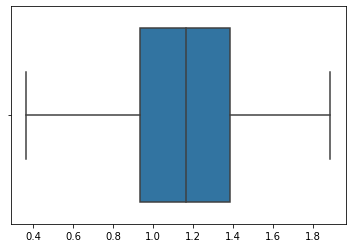

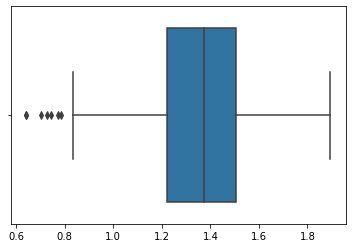

In [211]:
# add code here
for column in col:
    x=df[column].values
    sns.boxplot(x=x, data=df)
    plt.show()


### Standardize the features using sklearn.preprocessing 
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.<br>
<br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [237]:
# add code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
feature_data=df[['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ']].copy()

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [271]:
# add code here
scaled_data=scaler.fit_transform(feature_data)

**Scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [272]:
# add code here
X=pd.DataFrame(scaled_data, columns=col)
X.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initaial dataframe "df"

In [273]:
# add code here
from sklearn.model_selection import train_test_split
y=df['TARGET CLASS']


**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [289]:
# add code here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Model fit and training

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1. Fit this on X_train and y_train**

In [290]:
# add code here
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [291]:
# add code here
pred=model.predict(X_test)

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [292]:
# add code here
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       155
           1       0.89      0.93      0.91       145

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300



**Print the accuracy using numpy and round it to 3 decimal places.**

In [293]:
# add code here
print(round(model.score(X_test, y_test),3))

0.913


### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [311]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list

# add code here
acc=[]
for i in range(1,61):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    pred=model.predict(X_test)
    acc.append(round(model.score(X_test, y_test),3))

**Plot a graph of K value vs Accuracy**

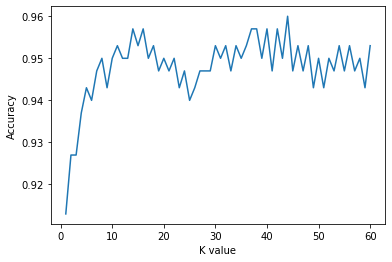

In [309]:
# add code here
plt.plot(range(1,61),acc)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [312]:
# add code here 
best_value=40
acc[best_value-1]
#The accuracy is approximately the highest around that point and does not
#increase after that point even on increasing the value of k

0.957

# 3). Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [417]:
#write code here
titanic_df=pd.read_csv('titanic_data.csv')
from sklearn.tree import DecisionTreeClassifier
print(titanic_df.columns, titanic_df.head())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0

<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [418]:
titanic_df['male'] = titanic_df['Sex'] == 'male'

In [419]:
def normalize(data_list):
  X_new = []
  X_max = max(data_list)
  X_min = min(data_list)
  for i in data_list:
    X_new.append( (i - X_min)/(X_max - X_min) )
  return X_new


def preprocessing_t1(train_df):
    train_df.drop(["PassengerId", "Ticket", "Name"], axis=1, inplace=True)
    
    df_nan = pd.DataFrame()
    
    nan_dict = {}
    for i in train_df.columns:
      nan_dict[i] = (train_df[i].isnull().sum()/len(train_df))*100
    
    df_nan["Column"] = nan_dict.keys()
    df_nan["nan_percentage"] = nan_dict.values()
    
    train_df.drop(["Cabin"], axis=1, inplace=True)
    
    train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)
    train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)
    train_df["Family_members"] = train_df["SibSp"] + train_df["Parch"]
    train_df.drop(["SibSp", "Parch"], axis=1, inplace=True)
    
    train_df["Age"] = normalize(train_df["Age"])
    train_df["Fare"] = normalize(train_df["Fare"])
    train_df["Family_members"] = normalize(train_df["Family_members"]) 
    
    df_ohe = pd.get_dummies(train_df, columns=["Pclass", "Sex", "Embarked"])
    return df_ohe
  #enter preprocessing steps as done in task 1
  #make sure the preprocessed dataframe looks like the output in task 1
  #return the dataframe
  #pass #remove this line after writing the code
titanic_df=preprocessing_t1(titanic_df)

<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [420]:
#write code here
y=titanic_df['Survived'].values

<b>remove the y_label (survived) from the dataframe</b>

In [421]:
#write code here
X=titanic_df[['Age', 'Fare', 'male']].values

<b>Split the data into train and test. (do a split in the ratio 30:70)</b>

In [422]:
#write code here
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>

Make sure that you play with the hyperparameters to get a good result. You can even use bagging and boosting methods like random forest or adaboost to improve your accuracy. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

<b>Note that the accuracy on the test set will be considered and brownie points for not overfitting the model in the process</b>

In [429]:
#write code here
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=50, shuffle=True)
test_acc=[]
train_acc=[]
model = RandomForestClassifier(n_estimators=300, max_depth=15)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    test_acc.append(model.score(X_test, y_test))
    train_acc.append(model.score(X_train, y_train))

<b>print the test accuracy and train accuracy here</b>

In [430]:
#write code here
print('test accuracy: ', max(test_acc))
print('train accuracy:', train_acc[test_acc.index(max(test_acc))])

test accuracy:  1.0
train accuracy: 0.979381443298969
